#PART 1: Fill-in-the-Blanks Code
##Part 1.1 – Bias and Variance: Linear Regression

We start with generating synthetic linear data and fitting a linear model.

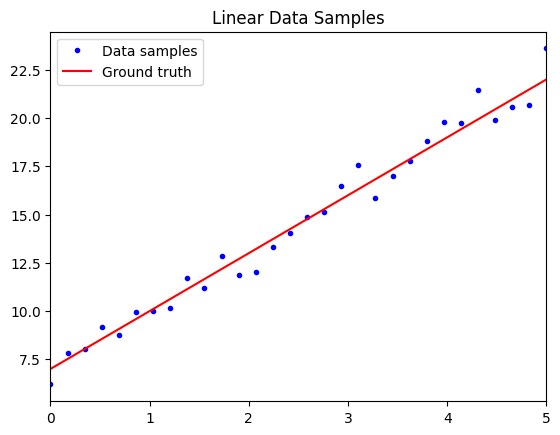

w1: 3.0941
w0: 6.8109


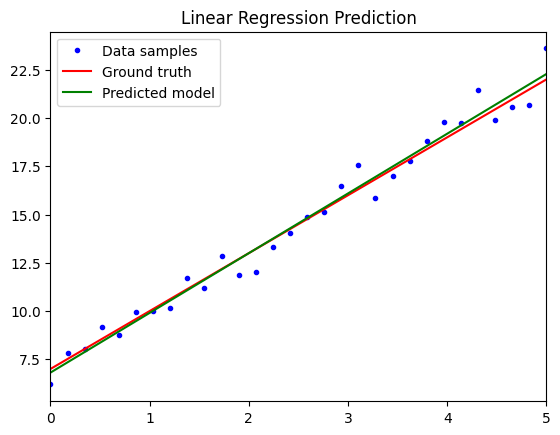

In [36]:
# -*- coding: utf-8 -*-
"""
EE214 Enhanced Fill-in-the-Blanks Assignment – Part 1.1
Topic: Linear Regression and Bias-Variance Tradeoff
"""

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

def linear_sample(sample_size, interval, noise=1.0, seed=1000):
    np.random.seed(seed)
    x = np.linspace(*interval, sample_size)
    ground_truth = 3 * x + 7
    y = ground_truth + np.random.randn(x.size) * noise
    return x, y, ground_truth

# Generate linear samples and plot
sample_size = 30
interval = (0, 5)
x, y, ground_truth = linear_sample(sample_size, interval)
plt.figure()
plt.plot(x, y, 'b.', label='Data samples')
plt.plot(x, ground_truth, 'r', label='Ground truth')
plt.xlim(*interval)
plt.legend()
plt.title("Linear Data Samples")
plt.show()

# Fit linear regression model
linear_model = LinearRegression()
linear_model.fit(x.reshape(-1, 1), y)
print(f'w1: {linear_model.coef_[0]:.4f}')
print(f'w0: {linear_model.intercept_:.4f}')

# Predict on new samples and plot
sample_size_pred = 10
new_x = np.linspace(*interval, sample_size_pred)
y_pred = linear_model.predict(new_x.reshape(-1, 1))

plt.figure()
plt.plot(x, y, 'b.', label='Data samples')
plt.plot(x, ground_truth, 'r', label='Ground truth')
plt.plot(new_x, y_pred, 'g', label='Predicted model')
plt.xlim(*interval)
plt.legend()
plt.title("Linear Regression Prediction")
plt.show()


##Part 1.2 – Polynomial Regression

In this section, we extend to a non-linear relationship and use polynomial regression. Complete the following functions:

#### **(a) Fitting a Polynomial Model**

Fill in the blanks to:

    Convert the input 1D data x to its polynomial feature form (with a bias term).
    Fit a linear regression model on the transformed data.

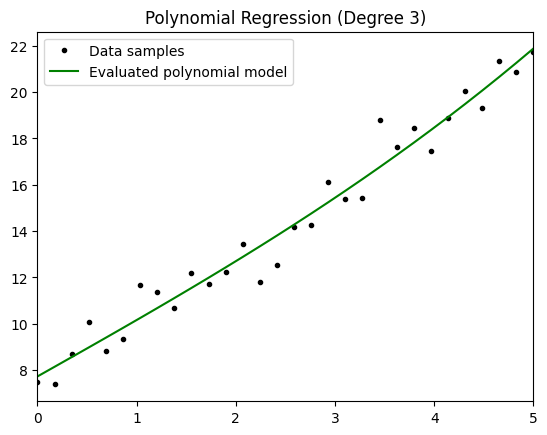

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

def fit_polynomial(x, y, degree):
    """
    Fits a polynomial regression model on input samples.
    Args:
      x: 1D numpy array of shape (n_samples,)
      y: 1D numpy array of targets
      degree: integer, degree of the polynomial
    Returns:
      model: a fitted linear regression model on the polynomial features
      poly: the fitted PolynomialFeatures transformer (to be used for evaluation)
    """
    # ------------ Blank: Create polynomial features ------------
    # You should instantiate a PolynomialFeatures object,
    # transform x into a 2D array with polynomial terms,
    # and store the transformed data in a variable X.
    poly = PolynomialFeatures(degree)
    # Transform x into shape (-1,1) then into polynomial features.
    X = poly.fit_transform(x.reshape(-1, 1))
    # ------------------------------------------------------------

    # Fit linear regression on the polynomial features.
    model = LinearRegression()
    model.fit(X, y)
    return model, poly

# Example usage:
nonlinear_func = lambda x: 3.6 * np.sin(2.4 * x)
x_poly, y_poly, (ground_truth_poly) = linear_sample(sample_size, interval, noise=1.0, seed=42)
degree_poly = 3
model_poly, poly_transformer = fit_polynomial(x_poly, y_poly, degree_poly)

# Evaluate and plot
new_x_poly = np.linspace(*interval, sample_size)
X_new_poly = poly_transformer.transform(new_x_poly.reshape(-1,1))
y_poly_pred = model_poly.predict(X_new_poly)

plt.figure()
plt.plot(x_poly, y_poly, 'k.', label='Data samples')
# plt.plot(x_full, ground_truth_poly, 'b', label='Ground truth')
plt.plot(new_x_poly, y_poly_pred, 'g', label='Evaluated polynomial model')
plt.xlim(*interval)
plt.legend()
plt.title("Polynomial Regression (Degree 3)")
plt.show()


####**(b) Evaluating a Polynomial Model**

Fill in the blank to create a function that transforms new data using the previously created `PolynomialFeatures transformer` and then makes predictions using the model.

In [38]:
def evaluate_polynomial(model, poly, x):
    """
    Evaluates a fitted polynomial regression model on input x.
    Args:
      model: trained linear regression model
      poly: PolynomialFeatures transformer used during training
      x: numpy array of shape (n_samples,) to predict on
    Returns:
      y_pred: predicted values
    """
    # ------------ Blank: Transform and predict ------------
    # Your code should:
    # 1. Reshape x to a 2D array (if necessary).
    # 2. Use the poly transformer to transform x.
    # 3. Use the model to predict y.
    X_transformed = poly.fit_transform(x.reshape(-1, 1))
    y_pred = model.predict(X_transformed)
    # ------------------------------------------------------
    return y_pred

# Test evaluation:
y_poly_pred_test = evaluate_polynomial(model_poly, poly_transformer, new_x_poly)


##Part 1.3 – Regression with Gaussian Basis Functions

Instead of polynomial features, we now use a Gaussian (RBF) basis.

####**(a) Fitting with Gaussian Basis**

Implement a function that creates a design matrix using Gaussian basis functions. Here, set the centers $μ_j=j$ for $j=1,…,degree$ and use $σ=1.0$.

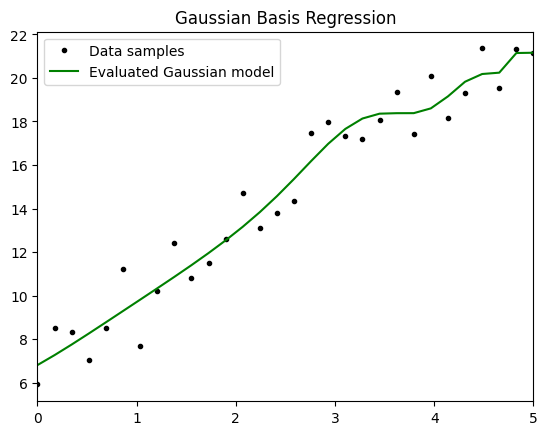

In [39]:
def fit_gaussian(x, y, degree):
    """
    Fits a regression model using Gaussian basis functions.
    Args:
      x: 1D numpy array (n_samples,)
      y: 1D numpy array (targets)
      degree: number of Gaussian basis functions
    Returns:
      model: a fitted LinearRegression model
      X: the design matrix created using the Gaussian basis functions
    """
    sigma = 1.0
    # ------------ Blank: Create Gaussian design matrix ------------
    # Your code should:
    # 1. Initialize an array X with shape (n_samples, degree + 1) where the first column is all ones.
    # 2. For each basis function (for j from 1 to degree), compute:
    #    phi_j(x) = exp(- (x - mu_j)^2 / (2*sigma^2)), where mu_j = j.
    # 3. Place each computed column into X.
    n_samples = x.shape[0]
    X = np.ones((n_samples, degree + 1))
    for j in range(1, degree + 1):
        mu = j
        X[:, j] = np.exp(- (x - mu)**2 / (2 * sigma**2))
    # --------------------------------------------------------------

    # Fit the model using LinearRegression
    model = LinearRegression()
    model.fit(X, y)
    return model, X

# Example usage:
x_gauss, y_gauss, (ground_truth_gauss) = linear_sample(sample_size, interval, noise=1.0, seed=123)
degree_gauss = 10
model_gauss, X_gauss = fit_gaussian(x_gauss, y_gauss, degree_gauss)

# Evaluate on new_x using the same transformation:
def evaluate_gaussian(model, x, degree):
    """
    Evaluate the fitted Gaussian basis model on new x.
    Args:
      model: trained LinearRegression model using Gaussian basis
      x: numpy array of shape (n_samples,)
      degree: the degree used during training (number of basis functions)
    Returns:
      y_pred: predicted values
    """
    sigma = 1.0
    n_samples = x.shape[0]
    X = np.ones((n_samples, degree + 1))
    # ------------ Blank: Create Gaussian features for evaluation ------------
    for j in range(1, degree + 1):
        mu = j
        X[:, j] = np.exp(- (x - mu)**2 / (2 * sigma**2))
    # -------------------------------------------------------------------------
    y_pred = model.predict(X)
    return y_pred

# Plot the Gaussian regression result:
new_x_gauss = np.linspace(*interval, sample_size)
y_gauss_pred = evaluate_gaussian(model_gauss, new_x_gauss, degree_gauss)

plt.figure()
plt.plot(x_gauss, y_gauss, 'k.', label='Data samples')
# plt.plot(x_full_gauss, ground_truth_gauss, 'b', label='Ground truth')
plt.plot(new_x_gauss, y_gauss_pred, 'g', label='Evaluated Gaussian model')
plt.xlim(*interval)
plt.legend()
plt.title("Gaussian Basis Regression")
plt.show()


####**(b) Regularized Regression with Gaussian Basis**

Now modify the previous approach to include a regularization term using Ridge regression. Complete the following function:

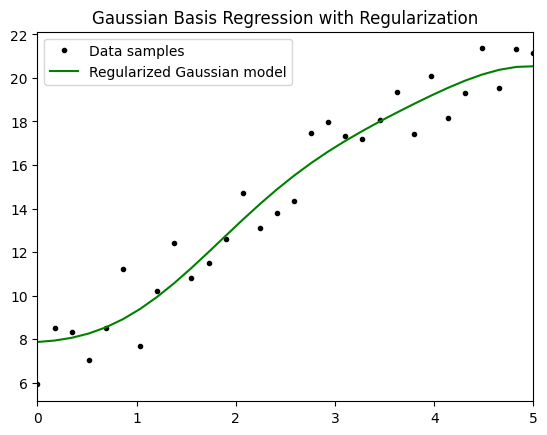

In [40]:
from sklearn.linear_model import Ridge

def fit_gaussian_reg(x, y, degree, lambda_, regressor):
    """
    Fits a regression model using Gaussian basis functions with L2 regularization.
    Args:
      x: 1D numpy array (n_samples,)
      y: 1D numpy array (targets)
      degree: number of Gaussian basis functions
      lambda_: regularization strength (alpha for Ridge)
      regressor: regressor class to use (e.g., Ridge)
    Returns:
      model: a fitted regularized regression model
    """
    sigma = 1.0
    n_samples = x.shape[0]
    X = np.ones((n_samples, degree + 1))
    # ------------ Blank: Construct Gaussian design matrix for regularization ------------
    for j in range(1, degree + 1):
        mu = j
        X[:, j] = np.exp(- (x - mu)**2 / (2 * sigma**2))
    # -------------------------------------------------------------------------------------------

    model = regressor(alpha=lambda_)
    model.fit(X, y)
    return model

# Example usage:
lambda_reg = 0.1  # Choose a suitable lambda
model_gauss_reg = fit_gaussian_reg(x_gauss, y_gauss, degree_gauss, lambda_reg, Ridge)
y_gauss_reg_pred = evaluate_gaussian(model_gauss_reg, x_gauss, degree_gauss)

plt.figure()
plt.plot(x_gauss, y_gauss, 'k.', label='Data samples')
# plt.plot(x_full_gauss, ground_truth_gauss, 'b', label='Ground truth')
plt.plot(x_gauss, y_gauss_reg_pred, 'g', label='Regularized Gaussian model')
plt.xlim(*interval)
plt.legend()
plt.title("Gaussian Basis Regression with Regularization")
plt.show()


##Part 1.4 – Integrated Squared Bias and Variance Calculation

In this section, you will train multiple models (using regularized Gaussian basis) on different training sets to compute the average prediction, integrated squared bias, and integrated variance.

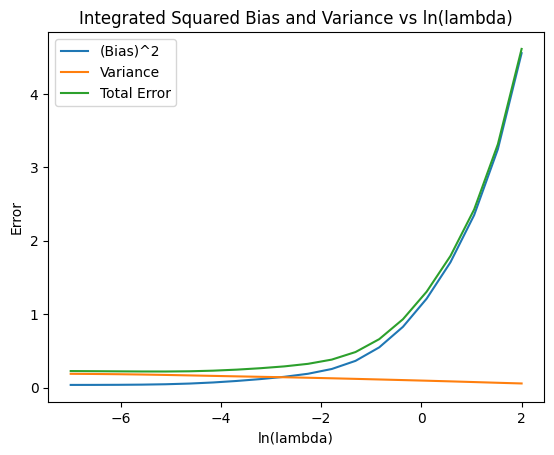

In [41]:
from numpy.linalg import norm

# Parameters for bias-variance experiment
sample_size = 30
n_models = 100
linpenals = np.linspace(start=-7, stop=2, num=20)  # lambda = exp(-7) ... exp(2)
lambdas = np.exp(linpenals)
degree_bias = 5

# Create fixed test data (with a different noise level and seed for reproducibility)
x_test, y_test, ground_truth_test = linear_sample(sample_size, interval, noise=2.0, seed=0)

squared_bias_list = []
variance_list = []

# ------------ Blank: Loop over lambda values to compute bias and variance ------------
for lambda_val in lambdas:
    predictions = []  # To store predictions from each model
    # Train n_models models on different training samples
    for i in range(n_models):
        # Generate a new training set for each model (noise fixed to 1)
        x_train, y_train, _ = linear_sample(sample_size, interval, noise=1.0, seed=1000 + i)
        # Fit regularized Gaussian model
        model = fit_gaussian_reg(x_train, y_train, degree_bias, lambda_val, Ridge)
        # Evaluate on the fixed test set using our evaluation function
        y_pred = evaluate_gaussian(model, x_test, degree_bias)
        predictions.append(y_pred)
    predictions = np.array(predictions)  # shape: (n_models, n_test_samples)
    # Compute the average prediction for each test sample
    avg_prediction = np.mean(predictions, axis=0)
    # Compute integrated squared bias (average squared difference between avg_prediction and ground truth)
    squared_bias = norm(avg_prediction - ground_truth_test) ** 2 / sample_size
    # Compute integrated variance (average variance across test samples)
    variance = sum(norm(avg_prediction - y_pred) ** 2 for y_pred in predictions) / (sample_size * n_models)
    squared_bias_list.append(squared_bias)
    variance_list.append(variance)
# -----------------------------------------------------------------------------------------

plt.figure()
plt.plot(linpenals, squared_bias_list, label='(Bias)^2')
plt.plot(linpenals, variance_list, label='Variance')
plt.plot(linpenals, np.array(squared_bias_list) + np.array(variance_list), label='Total Error')
plt.xlabel('ln(lambda)')
plt.ylabel('Error')
plt.legend()
plt.title("Integrated Squared Bias and Variance vs ln(lambda)")
plt.show()


##Part 1.5 – PCA Implementation from Scratch

Using the Iris dataset, implement PCA manually using NumPy.

####**(a) Standardization**
Ensure that each feature has the same scale. PCA is sensitive to the variance of each feature, so standardization is necessary.

In [42]:
import pandas as pd
from sklearn import datasets

iris = datasets.load_iris()
iris_x = iris.data  # shape: (n_samples, n_features)
iris_y = iris.target

# ------------ Blank: Standardize the dataset ------------
# Your code should:
# 1. Compute the mean of each feature (column).
# 2. Compute the standard deviation of each feature.
# 3. Subtract the mean and divide by the std for each feature.
mean_vals = np.mean(iris.data, axis=0)
std_vals = np.std(iris_x, axis=0)
z = (iris_x - mean_vals) / std_vals
# ---------------------------------------------------------

print("The mean of standardized data (should be near 0):", z.mean(axis=0))


The mean of standardized data (should be near 0): [-1.69031455e-15 -1.84297022e-15 -1.69864123e-15 -1.40924309e-15]


####**(b) Covariance Matrix and Eigen Decomposition**
Understand the relationships (variance and correlation) between features by computing the covariance matrix and finding its eigenvalues and eigenvectors.

In [43]:
# ------------ Blank: Compute covariance matrix ------------
n, d = z.shape
cov_matrix = (z.T @ z) / (n - 1)
# ---------------------------------------------------------

print("Covariance matrix shape:", cov_matrix.shape)

# ------------ Blank: Compute eigenvalues and eigenvectors ------------
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
# ---------------------------------------------------------

# Sort eigenvalues and eigenvectors in descending order
sorted_idx = np.argsort(eig_vals)[::-1]
sorted_eig_vals = eig_vals[sorted_idx]
sorted_eig_vecs = eig_vecs[:, sorted_idx]
print("First 2 eigenvalues:", sorted_eig_vals[:2])


Covariance matrix shape: (4, 4)
First 2 eigenvalues: [2.93808505 0.9201649 ]


####**(c) Projection onto Principal Components**
Reduce the dimensionality of the data by projecting it onto the most important (highest-variance) principal components.

Projected data shape (should be n_samples x 2): (150, 2)


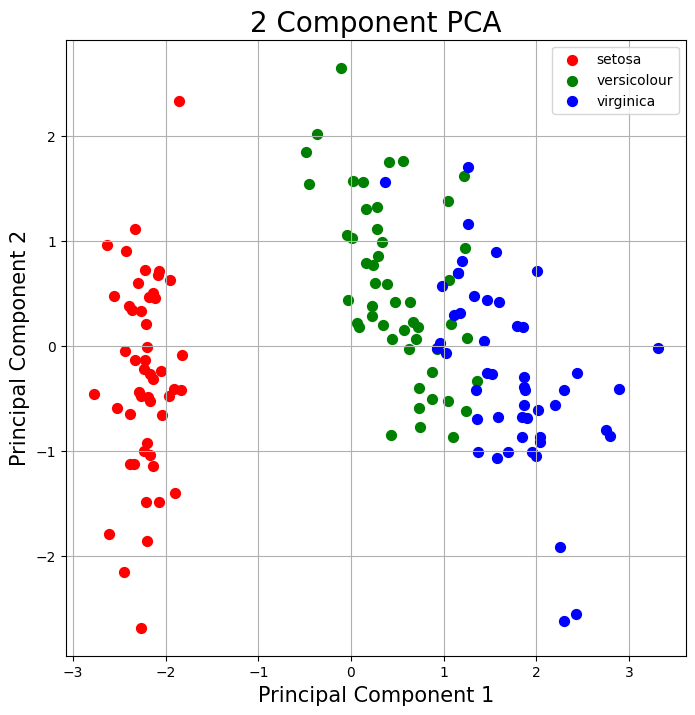

In [44]:
# ------------ Blank: Project the data onto the first 2 principal components ------------
# Use the first 2 sorted eigenvectors to form the projection matrix.
W2 = sorted_eig_vecs[:, :2]
projected_X = np.dot(z, W2)
# ------------------------------------------------------------------------------

print("Projected data shape (should be n_samples x 2):", projected_X.shape)

# Visualization
principalDf = pd.DataFrame(data=projected_X, columns=['PC1','PC2'])
principalDf['target'] = iris_y

plt.figure(figsize=(8,8))
targets = {0: 'setosa', 1: 'versicolour', 2: 'virginica'}
colors = ['r', 'g', 'b']
for target, color in zip(targets.keys(), colors):
    indicesToKeep = principalDf['target'] == target
    plt.scatter(principalDf.loc[indicesToKeep, 'PC1'],
                principalDf.loc[indicesToKeep, 'PC2'],
                c=color, s=50, label=targets[target])
plt.xlabel('Principal Component 1', fontsize=15)
plt.ylabel('Principal Component 2', fontsize=15)
plt.title('2 Component PCA', fontsize=20)
plt.legend()
plt.grid()
plt.show()


#### **(d) PCA via Power Iteration (Optional Advanced Task)**

Implement the power method to compute the first eigenvector and then compute the second eigenvector by deflating the covariance matrix.

First eigenvalue (power method): 2.938085050199995
First eigenvector (power method): [ 0.52106591 -0.26934744  0.5804131   0.56485654]
Second eigenvalue (power method): 0.9201649041624858
Second eigenvector (power method): [-0.37741762 -0.92329566 -0.02449161 -0.06694199]


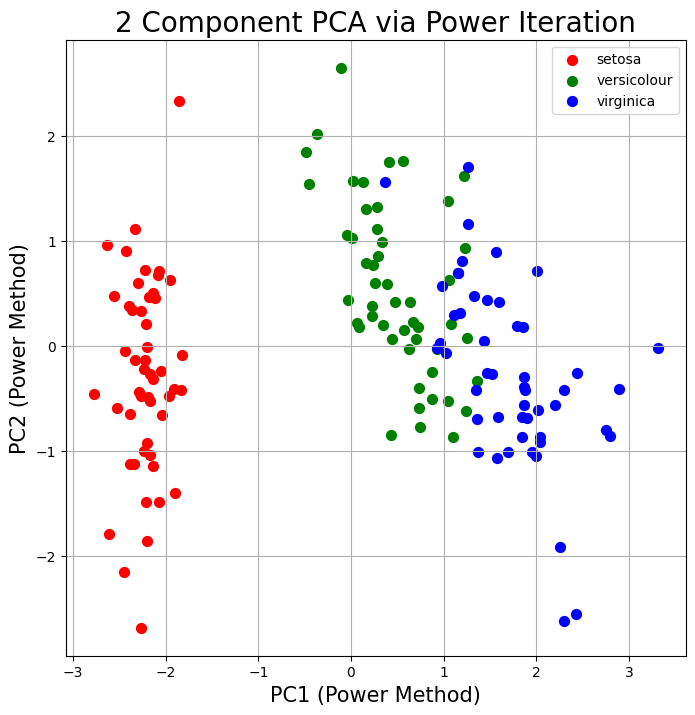

In [45]:
from numpy.linalg import norm

np.random.seed(214)
d = cov_matrix.shape[0]
first_eigvec = np.random.randn(d)
for _ in range(20):
    first_eigvec = np.dot(cov_matrix, first_eigvec)
    first_eigvec = first_eigvec / norm(first_eigvec)
first_eigval = np.dot(first_eigvec.T, np.dot(cov_matrix, first_eigvec))
print("First eigenvalue (power method):", first_eigval)
print("First eigenvector (power method):", first_eigvec)

# ------------ Blank: Compute the second eigenvector using deflation ------------
# Hint: Subtract the contribution of the first eigenvector from the covariance matrix,
# then apply the power method to the deflated matrix.
C_deflated = cov_matrix - first_eigval * np.outer(first_eigvec, first_eigvec)
second_eigvec = np.random.randn(d)
for _ in range(20):
    second_eigvec = np.dot(C_deflated, second_eigvec)
    second_eigvec = second_eigvec / norm(second_eigvec)
second_eigval = np.dot(second_eigvec.T, np.dot(C_deflated, second_eigvec))
# -----------------------------------------------------------------------------

print("Second eigenvalue (power method):", second_eigval)
print("Second eigenvector (power method):", second_eigvec)

# Project data onto the two eigenvectors from power iteration
principal_components = np.column_stack((first_eigvec, second_eigvec))
projected_X_power = np.dot(z, principal_components)

plt.figure(figsize=(8,8))
for target, color in zip(targets.keys(), colors):
    indicesToKeep = (iris_y == target)
    plt.scatter(projected_X_power[indicesToKeep, 0],
                projected_X_power[indicesToKeep, 1],
                c=color, s=50, label=targets[target])
plt.xlabel('PC1 (Power Method)', fontsize=15)
plt.ylabel('PC2 (Power Method)', fontsize=15)
plt.title('2 Component PCA via Power Iteration', fontsize=20)
plt.legend()
plt.grid()
plt.show()


#### **(e) PCA using scikit-learn**
Use the built-in PCA implementation from scikit-learn to perform dimensionality reduction more efficiently and verify your manual implementation.

Mean after StandardScaler (should be 0): [-1.69031455e-15 -1.84297022e-15 -1.69864123e-15 -1.40924309e-15]


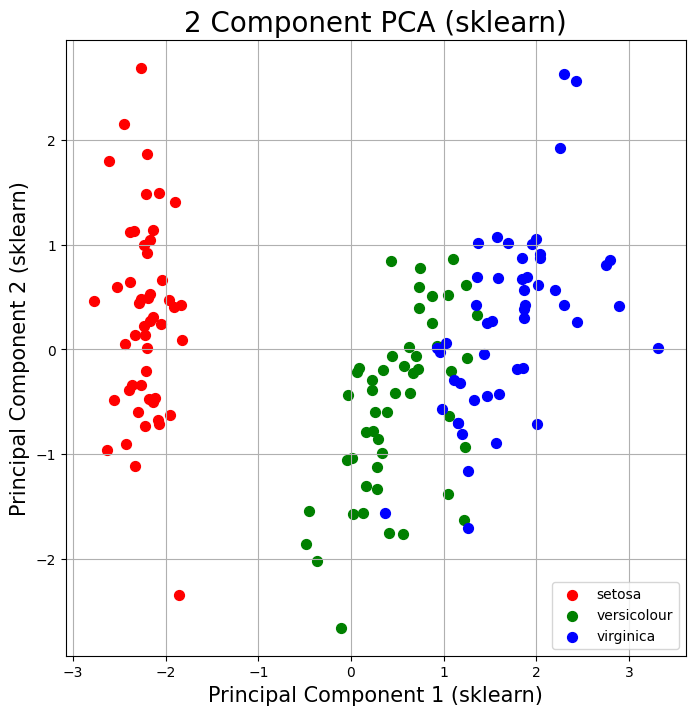

Eigenvalues from sklearn PCA: [2.93808505 0.9201649 ]
Variance ratio: [0.72962445 0.22850762]


In [46]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# ------------ Blank: Standardize using StandardScaler ------------
scaler = StandardScaler()
z_sk = scaler.fit_transform(iris_x)
# ---------------------------------------------------------------

print("Mean after StandardScaler (should be 0):", z_sk.mean(axis=0))

# ------------ Blank: Apply sklearn PCA to project to 2 components ------------
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(z_sk)
# -------------------------------------------------------------------------

principalDf_sk = pd.DataFrame(data=principalComponents, columns=['PC1','PC2'])
principalDf_sk['target'] = iris_y

plt.figure(figsize=(8,8))
for target, color in zip(targets.keys(), colors):
    indicesToKeep = (iris_y == target)
    plt.scatter(principalDf_sk.loc[indicesToKeep, 'PC1'],
                principalDf_sk.loc[indicesToKeep, 'PC2'],
                c=color, s=50, label=targets[target])
plt.xlabel('Principal Component 1 (sklearn)', fontsize=15)
plt.ylabel('Principal Component 2 (sklearn)', fontsize=15)
plt.title('2 Component PCA (sklearn)', fontsize=20)
plt.legend()
plt.grid()
plt.show()

print("Eigenvalues from sklearn PCA:", pca.explained_variance_)
print("Variance ratio:", pca.explained_variance_ratio_)
